<a href="https://colab.research.google.com/github/raihanrama/Data-Analyst-Dataset-RS-IPYNB/blob/main/Muhammad_Raihan_Ramadhan_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.IMPORT DATASET**

## 1.1 **Download semua kebutuhan**

In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

## **1.2 Import Dataset**

In [ ]:
# ===========================
# IMPORT LIBRARY
# ===========================
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, kurtosis

sns.set()
%matplotlib inline

In [ ]:
# ===========================
# LOAD DATASET
# ===========================
file_path = "/content/dataset - DataSheetClean_RumahSakitIndonesia.csv"
df = pd.read_csv(file_path)

print("=== Data Loaded ===")
print(f"Jumlah Baris : {df.shape[0]}")
print(f"Jumlah Kolom : {df.shape[1]}")
print("="*40)

=== Data Loaded ===
Jumlah Baris : 3167
Jumlah Kolom : 12


In [ ]:
# Ringkasan Awal Dataset
print("\n=== Ringkasan Awal Dataset ===")
print(f"Tipe Data: {type(df)}")
print(f"Ukuran Dataset: {df.size} elemen")
print(f"Apakah ada missing values?: {df.isnull().any().any()}")


=== Ringkasan Awal Dataset ===
Tipe Data: <class 'pandas.core.frame.DataFrame'>
Ukuran Dataset: 38004 elemen
Apakah ada missing values?: True


# **2.EDA**

## **2.1 Melihat Struktur Dataset**

In [ ]:
# ===========================
# MELIHAT 5 BARIS DATA PERTAMA
# ===========================
print("\n=== 5 Data Teratas ===")
display(df.head())


=== 5 Data Teratas ===


,Kode_RS,Nama_RS,Provinsi,Kabupaten,Alamat_RS,Jenis_RS,Kelas_RS,Status_Blu,Kepemilikan_RS,Total_Tempat_Tidur,Total_Layanan,Total_Tenaga_Kerja
0,9271080.0,RS Umum Daerah Ramela Muara Tami,Papua,Kota Jayapura,"Jl. Protokol Koya Barat, Kel. Koya Barat, Dist...",Rumah Sakit Umum,D,Non BLU/BLUD,Pemkot,55,25,47
1,9271079.0,RS Provita Jayapura,Papua,Kota Jayapura,Jl. Sam Ratulangi No. 39 APO Jayapura Utara,Rumah Sakit Umum,C,BLU,Perorangan,124,44,204
2,9271078.0,RS Umum Daerah Yowari Sentani,Papua,Jayapura,"Jl. Raya Sentani - Depapre,Doyo Baru",Rumah Sakit Umum,C,BLUD,Pemkab,130,47,253
3,9271067.0,RS Bhayangkara Jayapura,Papua,Kota Jayapura,"Jl. Jeruk Nipis Furia Kotaraja,Jayapura",Rumah Sakit Umum,C,BLU,POLRI,132,39,340
4,9271056.0,RS Dian Harapan,Papua,Kota Jayapura,Jl. Teruna Bakti Waena Jayapura,Rumah Sakit Umum,C,Non BLU/BLUD,Organisasi Sosial,147,82,336


In [ ]:
# ===========================
# MELIHAT INFORMASI MENGENAI DATASET YANG DIGUNAKAN
# ===========================
print("\n=== Info Dataset ===")
df.info()


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kode_RS             3166 non-null   float64
 1   Nama_RS             3166 non-null   object 
 2   Provinsi            3167 non-null   object 
 3   Kabupaten           3167 non-null   object 
 4   Alamat_RS           3129 non-null   object 
 5   Jenis_RS            3164 non-null   object 
 6   Kelas_RS            3167 non-null   object 
 7   Status_Blu          3167 non-null   object 
 8   Kepemilikan_RS      3167 non-null   object 
 9   Total_Tempat_Tidur  3167 non-null   int64  
 10  Total_Layanan       3167 non-null   int64  
 11  Total_Tenaga_Kerja  3167 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 297.0+ KB


In [ ]:
print("\n=== Statistik Deskriptif (Numerik) ===")
display(df.describe())


=== Statistik Deskriptif (Numerik) ===


,Kode_RS,Total_Tempat_Tidur,Total_Layanan,Total_Tenaga_Kerja
count,3.166000e+03,3167.000000,3167.000000,3167.000000
mean,3.805750e+06,135.257026,48.316072,261.490685
std,2.006896e+06,549.924419,409.112055,381.753118
min,1.101015e+06,0.000000,-5.000000,0.000000
25%,3.171911e+06,54.000000,22.000000,57.000000
50%,3.326014e+06,102.000000,31.000000,153.000000
75%,5.103053e+06,154.500000,50.000000,335.000000
max,9.271080e+06,30343.000000,23000.000000,7939.000000


In [ ]:
print("\n=== Statistik Deskriptif (Objek) ===")
display(df.describe(include="object"))


=== Statistik Deskriptif (Objek) ===


,Nama_RS,Provinsi,Kabupaten,Alamat_RS,Jenis_RS,Kelas_RS,Status_Blu,Kepemilikan_RS
count,3166,3167,3167,3129,3164,3167,3167,3167
unique,3083,38,511,3117,21,8,7,22
top,RS Umum Permata Bunda,Jawa Timur,Kota Medan,"Jl. Basuki Rachmat No. 50, kel. Bugis, kec. S...",Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA
freq,4,433,64,2,2653,1717,2345,872


In [ ]:
# Tampilkan nama kolom dalam bentuk tabel
df_columns = pd.DataFrame(df.columns.tolist(), columns=['Nama Kolom'])
print("\n=== Nama Kolom (Tabel) ===")
display(df_columns)


=== Nama Kolom (Tabel) ===


,Nama Kolom
0,Kode_RS
1,Nama_RS
2,Provinsi
3,Kabupaten
4,Alamat_RS
5,Jenis_RS
6,Kelas_RS
7,Status_Blu
8,Kepemilikan_RS
9,Total_Tempat_Tidur


In [ ]:
print("\n=== Jumlah Nilai Unik Tiap Kolom ===")
print(df.nunique())


=== Jumlah Nilai Unik Tiap Kolom ===
Kode_RS               3154
Nama_RS               3083
Provinsi                38
Kabupaten              511
Alamat_RS             3117
Jenis_RS                21
Kelas_RS                 8
Status_Blu               7
Kepemilikan_RS          22
Total_Tempat_Tidur     405
Total_Layanan          162
Total_Tenaga_Kerja     814
dtype: int64


## **2.2 Melihat Missing Value, Duplikat, dan Nilai Null**

In [ ]:
# ===========================
# CEK JUMLAH NILAI DATA NULL PADA DATASET
# ===========================
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values)


=== Missing Values ===
Kode_RS                1
Nama_RS                1
Provinsi               0
Kabupaten              0
Alamat_RS             38
Jenis_RS               3
Kelas_RS               0
Status_Blu             0
Kepemilikan_RS         0
Total_Tempat_Tidur     0
Total_Layanan          0
Total_Tenaga_Kerja     0
dtype: int64


In [ ]:
# ===========================
# CEK PRESENTASE NILAI DATA NULL PADA DATASET
# ===========================
print("\n=== Persentase Nilai Null Values ===")
percent_missing = (missing_values / len(df)) * 100
print(percent_missing)


=== Persentase Nilai Null Values ===
Kode_RS               0.031576
Nama_RS               0.031576
Provinsi              0.000000
Kabupaten             0.000000
Alamat_RS             1.199874
Jenis_RS              0.094727
Kelas_RS              0.000000
Status_Blu            0.000000
Kepemilikan_RS        0.000000
Total_Tempat_Tidur    0.000000
Total_Layanan         0.000000
Total_Tenaga_Kerja    0.000000
dtype: float64


In [ ]:
# ===========================
# CEK DUPLIKAT PADA DATASET
# ===========================

print("\n=== Jumlah Data Duplikat ===")
print(df.duplicated().sum())

# Tampilkan baris yang terduplikat
print("\n=== Baris Data Duplikat ===")
display(df[df.duplicated(keep=False)]) # keep=False untuk menampilkan semua duplikat


=== Jumlah Data Duplikat ===
11

=== Baris Data Duplikat ===


,Kode_RS,Nama_RS,Provinsi,Kabupaten,Alamat_RS,Jenis_RS,Kelas_RS,Status_Blu,Kepemilikan_RS,Total_Tempat_Tidur,Total_Layanan,Total_Tenaga_Kerja
56,9106013.0,RS Umum Daerah Scholoo Keyen,Papua Barat Daya,Sorong Selatan,Jl. Teminabuan - Ayamaru Kampung Keyen - Temin...,Rumah Sakit Umum,C,BLUD,Pemkab,82,58,263
57,9106013.0,RS Umum Daerah Scholoo Keyen,Papua Barat Daya,Sorong Selatan,Jl. Teminabuan - Ayamaru Kampung Keyen - Temin...,Rumah Sakit Umum,C,BLUD,Pemkab,82,58,263
274,7314025.0,RS Umum Anugrah Pangkajene,Sulawesi Selatan,Sidenreng Rappang,"Jl. Lanto Dg. Pasewang No. 60, Kelurahan Pangk...",Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,75,24,76
275,7314025.0,RS Umum Anugrah Pangkajene,Sulawesi Selatan,Sidenreng Rappang,"Jl. Lanto Dg. Pasewang No. 60, Kelurahan Pangk...",Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,75,24,76
439,6472096.0,RS Umum Bhakti Nugraha,Kalimantan Timur,Kota Samarinda,"Jl. Basuki Rachmat No. 50, kel. Bugis, kec. S...",Rumah Sakit Umum,D,Non BLU/BLUD,Organisasi Sosial,62,13,74
440,6472096.0,RS Umum Bhakti Nugraha,Kalimantan Timur,Kota Samarinda,"Jl. Basuki Rachmat No. 50, kel. Bugis, kec. S...",Rumah Sakit Umum,D,Non BLU/BLUD,Organisasi Sosial,62,13,74
636,5320013.0,RS Pratama Raijua,Nusa Tenggara Timur,Sabu Raijua,"Kelurahan Ledeunu Kecamatan Raijua, Kabupaten ...",Rumah Sakit Umum,Belum Ditetapkan,Non BLU/BLUD,Pemkab,30,4,0
637,5320013.0,RS Pratama Raijua,Nusa Tenggara Timur,Sabu Raijua,"Kelurahan Ledeunu Kecamatan Raijua, Kabupaten ...",Rumah Sakit Umum,Belum Ditetapkan,Non BLU/BLUD,Pemkab,30,4,0
806,5102047.0,RS Umum Daerah Singasana,Bali,Tabanan,"Banjar Tegal Antugan, Desa Nyitdah, Kec. Kedir...",Rumah Sakit Umum,C,BLU,Pemkab,102,43,177
807,5102047.0,RS Umum Daerah Singasana,Bali,Tabanan,"Banjar Tegal Antugan, Desa Nyitdah, Kec. Kedir...",Rumah Sakit Umum,C,BLU,Pemkab,102,43,177



=== Visualisasi Outlier (Sebelum Pembersihan) ===


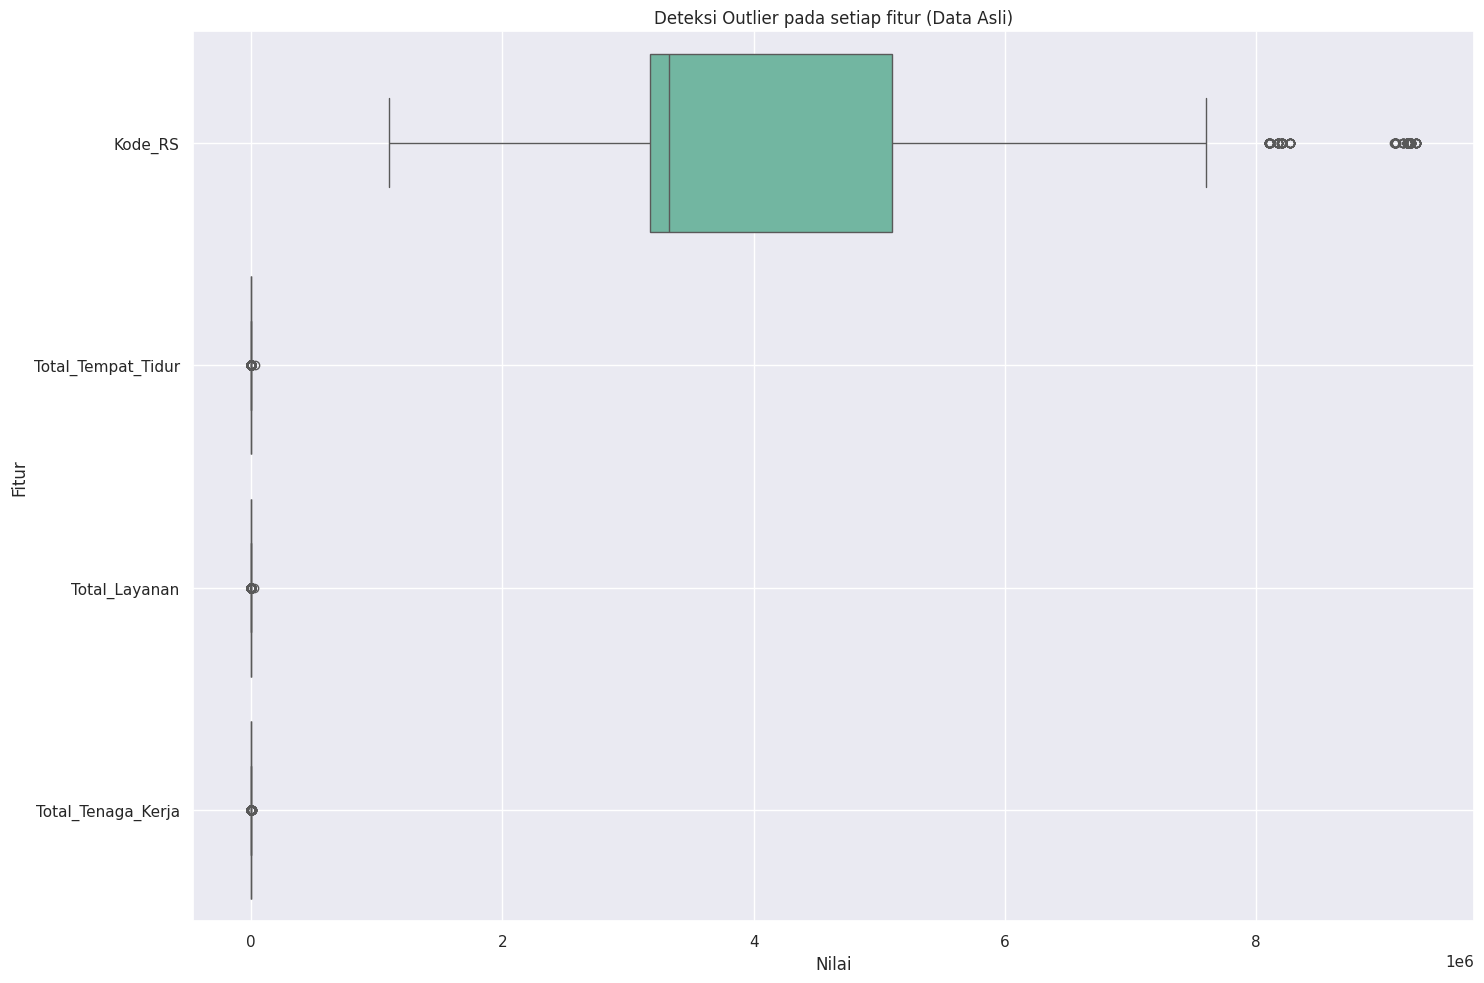

In [ ]:
# ===========================
# OUTLIER
# ===========================

# Visualisasi Outlier (menggunakan data asli untuk deteksi awal)
print("\n=== Visualisasi Outlier (Sebelum Pembersihan) ===")

# Ambil semua kolom numerik dari df
numerik_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Buat figure besar agar semua boxplot muat
plt.figure(figsize=(15, 10))

# Plot semua boxplot secara horizontal
sns.boxplot(data=df[numerik_cols], orient="h", palette="Set2")

plt.title("Deteksi Outlier pada setiap fitur (Data Asli)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.grid(True)
plt.tight_layout()
plt.show()

# **3. DATA PREPOCESSING**

In [ ]:
# ===========================
# PEMISAHAN TIPE DATA
# ===========================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
obj_cols = df.select_dtypes(include=['object']).columns

print("\nKolom Numerik :", num_cols.tolist())
print("Kolom Object  :", obj_cols.tolist())


Kolom Numerik : ['Kode_RS', 'Total_Tempat_Tidur', 'Total_Layanan', 'Total_Tenaga_Kerja']
Kolom Object  : ['Nama_RS', 'Provinsi', 'Kabupaten', 'Alamat_RS', 'Jenis_RS', 'Kelas_RS', 'Status_Blu', 'Kepemilikan_RS']


In [ ]:
# Distribusi Frekuensi Kolom Kategorikal (tabel DataFrame)
print("\n=== Distribusi Frekuensi Kolom Kategorikal ===")

for col in obj_cols:
    freq_df = (
       df[col]
       .value_counts(dropna=False)
        .reset_index()
    )
    freq_df.columns = [col, 'Count']
    freq_df['Percentage'] = (freq_df['Count'] / len(df) * 100).round(2)

    display(freq_df)  # Akan menampilkan tabel rapi di Jupyter / Notebook



=== Distribusi Frekuensi Kolom Kategorikal ===


,Nama_RS,Count,Percentage
0,RS Ibu dan Anak Annisa,4,0.13
1,RS Ibu dan Anak Mutiara Bunda,4,0.13
2,RS Umum Permata Bunda,4,0.13
3,RS Ibu dan Anak Permata Hati,4,0.13
4,RS Umum Permata Hati,4,0.13
...,...,...,...
3079,RS Islam Aminah,1,0.03
3080,RS Ibu dan Anak Tanjungsari,1,0.03
3081,RS Umum Aminah Blitar,1,0.03
3082,RS Umum Syuhada Haji,1,0.03


,Provinsi,Count,Percentage
0,Jawa Timur,433,13.67
1,Jawa Barat,422,13.32
2,Jawa Tengah,356,11.24
3,Sumatera Utara,204,6.44
4,DKI Jakarta,188,5.94
5,Banten,129,4.07
6,Sulawesi Selatan,124,3.92
7,Sumatera Selatan,87,2.75
8,Riau,82,2.59
9,Yogyakarta,81,2.56


,Kabupaten,Count,Percentage
0,Kota Medan,64,2.02
1,Kota Surabaya,64,2.02
2,Bekasi,54,1.71
3,Kota Makassar,52,1.64
4,Kota Jakarta Selatan,50,1.58
...,...,...,...
506,Dogiyai,1,0.03
507,Intan Jaya,1,0.03
508,Kota Subulussalam,1,0.03
509,Aceh Singkil,1,0.03


,Alamat_RS,Count,Percentage
0,NaN,38,1.20
1,"Jl. Basuki Rachmat No. 50, kel. Bugis, kec. S...",2,0.06
2,"Jl. Raya Kemantren Wetan No.49, Desa Terusan, ...",2,0.06
3,Jl. KH. Ahmad Dahlan No. 163 kelurahan kampung...,2,0.06
4,"Banjar Tegal Antugan, Desa Nyitdah, Kec. Kedir...",2,0.06
...,...,...,...
3113,"Jl. Pahlawan Trip No.2 Malang, Jawa Timur",1,0.03
3114,Jl. WR. Supratman No.10 Kota Malang,1,0.03
3115,Jl. Nusakambangan No.56 Kota Malang,1,0.03
3116,"Jl. Kebalen Wetan N0.2-8 Kedung Kandang, Kota ...",1,0.03


,Jenis_RS,Count,Percentage
0,Rumah Sakit Umum,2653,83.77
1,Rumah Sakit Khusus Ibu dan Anak,322,10.17
2,Rumah Sakit Khusus Jiwa,41,1.29
3,Rumah Sakit Khusus Mata,38,1.20
4,Rumah Sakit Khusus Gigi dan Mulut,34,1.07
5,Rumah Sakit Khusus Bedah,28,0.88
6,Rumah Sakit Khusus Jantung,12,0.38
7,Rumah Sakit Khusus Paru,9,0.28
8,Rumah Sakit Khusus Orthopedi,7,0.22
9,Rumah Sakit Khusus THT-KL,4,0.13


,Kelas_RS,Count,Percentage
0,C,1717,54.22
1,D,858,27.09
2,B,443,13.99
3,A,77,2.43
4,D PRATAMA,64,2.02
5,Belum Ditetapkan,4,0.13
6,Rumah Sakit Umum,3,0.09
7,Rumah Sakit Khusus Jiwa,1,0.03


,Status_Blu,Count,Percentage
0,Non BLU/BLUD,2345,74.04
1,BLUD,680,21.47
2,BLU,138,4.36
3,D PRATAMA,1,0.03
4,C,1,0.03
5,A,1,0.03
6,D,1,0.03


,Kepemilikan_RS,Count,Percentage
0,SWASTA/LAINNYA,872,27.53
1,Pemkab,651,20.56
2,Perusahaan,516,16.29
3,Organisasi Sosial,306,9.66
4,Pemprop,148,4.67
5,Pemkot,120,3.79
6,Organisasi Islam,119,3.76
7,TNI AD,78,2.46
8,Perorangan,73,2.31
9,POLRI,56,1.77


In [ ]:
# Skewness & Kurtosis
print("\n=== Skewness & Kurtosis (Numerik) ===")
for col in num_cols:
    skew_val = skew(df[col], nan_policy='omit')
    kurt_val = kurtosis(df[col], nan_policy='omit')
    print(f"{col} -> Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}")


=== Skewness & Kurtosis (Numerik) ===
Kode_RS -> Skewness: 0.85, Kurtosis: 0.01
Total_Tempat_Tidur -> Skewness: 52.41, Kurtosis: 2873.75
Total_Layanan -> Skewness: 55.78, Kurtosis: 3126.79
Total_Tenaga_Kerja -> Skewness: 6.52, Kurtosis: 85.63


In [ ]:
# ===========================
# IMPUTASI MISSING VALUES
# ===========================
df_clean = df.copy()

# Imputasi "Tidak Diketahui" untuk kolom object yang ditentukan
cols_to_fill_unknown = ['Alamat_RS', 'Jenis_RS', 'Nama_RS']
for col in cols_to_fill_unknown:
    if col in obj_cols and df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna("Tidak Diketahui", inplace=True)


# Imputasi 0 untuk Kode_RS
if 'Kode_RS' in num_cols and df_clean['Kode_RS'].isnull().sum() > 0:
    df_clean['Kode_RS'].fillna(0, inplace=True)


# Imputasi median untuk numerik (untuk kolom numerik lainnya)
for col in num_cols:
    if col not in cols_to_fill_unknown + ['Kode_RS'] and df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Imputasi modus untuk object (untuk kolom object lainnya)
for col in obj_cols:
    if col not in cols_to_fill_unknown and df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


print("\n=== Missing Values Setelah Imputasi ===")
print(df_clean.isnull().sum())

# Simpan hasil imputasi
df_clean.to_csv("dataset_after_imputation.csv", index=False)


=== Missing Values Setelah Imputasi ===
Kode_RS               0
Nama_RS               0
Provinsi              0
Kabupaten             0
Alamat_RS             0
Jenis_RS              0
Kelas_RS              0
Status_Blu            0
Kepemilikan_RS        0
Total_Tempat_Tidur    0
Total_Layanan         0
Total_Tenaga_Kerja    0
dtype: int64


/tmp/ipython-input-477930862.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna("Tidak Diketahui", inplace=True)
/tmp/ipython-input-477930862.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# ===========================
# CEK KEMBALI MISSING VALUE
# ===========================
# Missing values terbanyak
print("\n=== Missing Values (Urut Terbanyak) ===")
missing_percent = (df_clean.isnull().sum() / len(df)) * 100
missing_sorted = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_sorted)


=== Missing Values (Urut Terbanyak) ===
Series([], dtype: float64)


In [ ]:
# ===========================
# HAPUS DUPLIKAT
# ===========================
df_outlier_cleaned = df_clean.copy()
print(f"\nJumlah duplikat: {df_outlier_cleaned.duplicated().sum()}")
df_outlier_cleaned.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah hapus duplikat: {df_outlier_cleaned.shape[0]}")


Jumlah duplikat: 11
Jumlah baris setelah hapus duplikat: 3156


In [ ]:
# ===========================
# PENANGANAN OUTLIER DENGAN METODE IQR
# ===========================

# Kolom yang akan ditangani outlier-nya
outlier_cols = ['Total_Tempat_Tidur']

# Buat salinan DataFrame untuk penanganan outlier
df_outlier_cleaned = df_clean.copy()

for col in outlier_cols:
    Q1 = df_outlier_cleaned[col].quantile(0.25)
    Q3 = df_outlier_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data untuk menghilangkan outlier
    df_outlier_cleaned = df_outlier_cleaned[
        (df_outlier_cleaned[col] >= lower_bound) &
        (df_outlier_cleaned[col] <= upper_bound)
    ]

    print(f"Jumlah baris setelah menghilangkan outlier di kolom {col}: {df_outlier_cleaned.shape[0]}")

print("\n=== Outlier Removal Selesai ===")


Jumlah baris setelah menghilangkan outlier di kolom Total_Tempat_Tidur: 3013

=== Outlier Removal Selesai ===


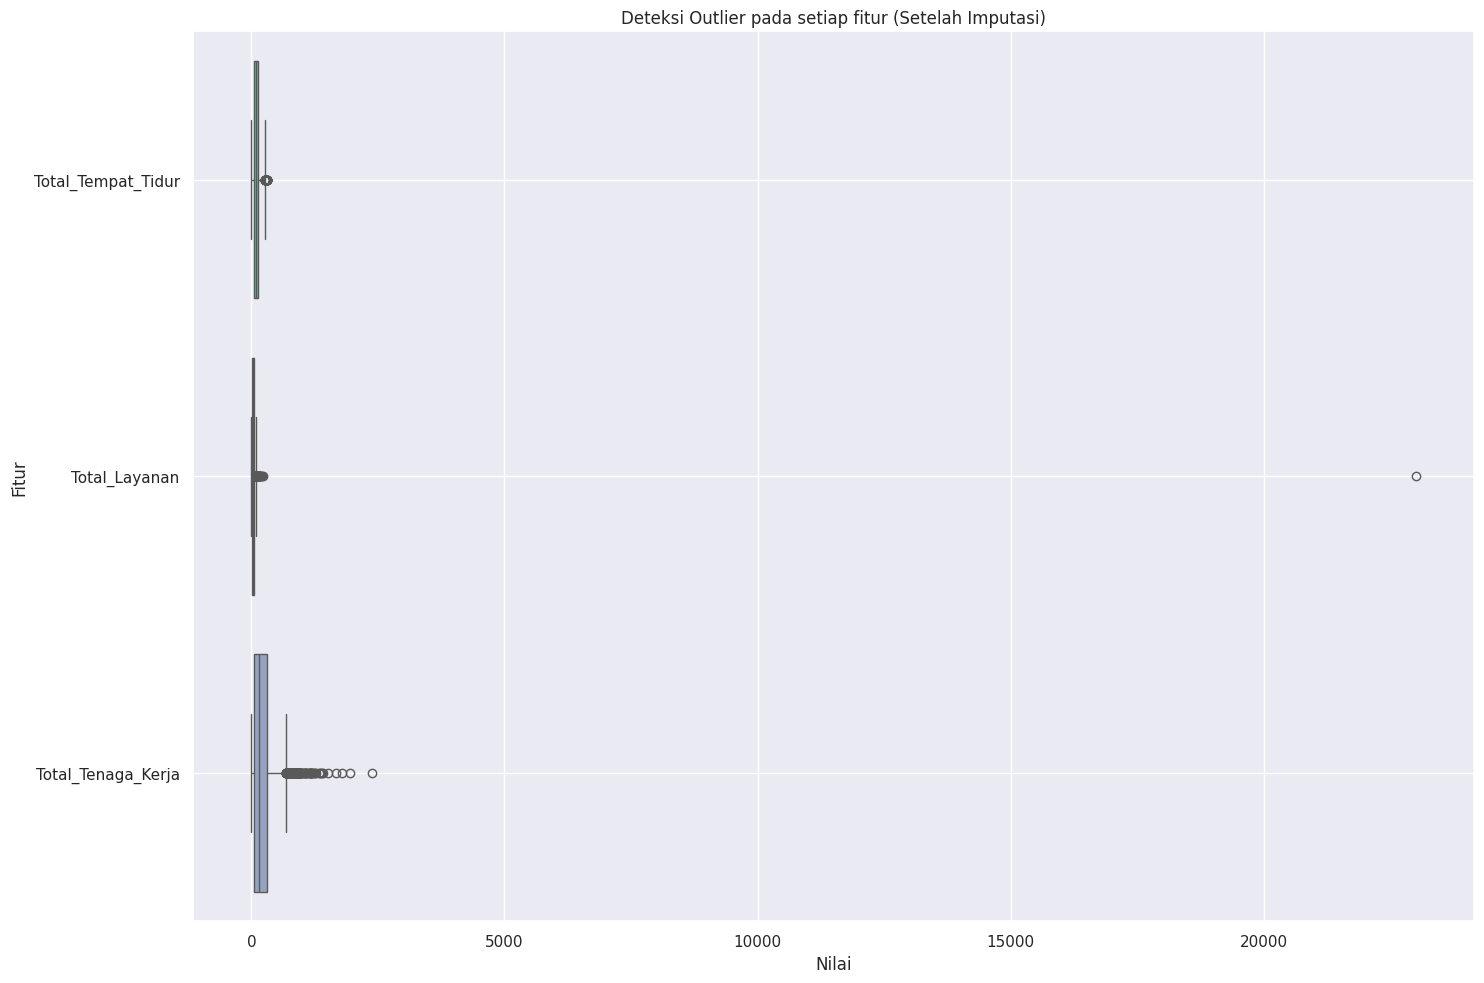

In [ ]:
# ===========================
# VISUALISASI OUTLIER
# ===========================

# Ambil kolom numerik yang diinginkan dari df_clean (kecuali Kode_RS)
numerik_cols_clean = ['Total_Tempat_Tidur', 'Total_Layanan', 'Total_Tenaga_Kerja']

# Buat figure besar agar semua boxplot muat
plt.figure(figsize=(15, 10))

# Plot semua boxplot secara horizontal (orientasi agar lebih mudah dibaca)
sns.boxplot(data=df_outlier_cleaned[numerik_cols_clean], orient="h", palette="Set2")

plt.title("Deteksi Outlier pada setiap fitur (Setelah Imputasi)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ===========================
# PENANGANAN OUTLIER DENGAN METODE IQR
# ===========================

# Kolom yang akan ditangani outlier-nya
outlier_cols = ['Total_Tempat_Tidur']

# Buat salinan DataFrame untuk penanganan outlier
df_outlier_cleaned2 = df_outlier_cleaned.copy() # Corrected: added .copy()

for col in outlier_cols:
      Q1 = df_outlier_cleaned2[col].quantile(0.25)
      Q3 = df_outlier_cleaned2[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Filter data untuk menghilangkan outlier
      df_outlier_cleaned2 = df_outlier_cleaned2[ # Corrected: filtering df_outlier_cleaned2
          (df_outlier_cleaned2[col] >= lower_bound) &
          (df_outlier_cleaned2[col] <= upper_bound)
     ]

      print(f"Jumlah baris setelah menghilangkan outlier di kolom {col}: {df_outlier_cleaned2.shape[0]}") # Corrected: printing shape of df_outlier_cleaned2
print("\n=== Outlier Removal Selesai ===")

Jumlah baris setelah menghilangkan outlier di kolom Total_Tempat_Tidur: 2954

=== Outlier Removal Selesai ===


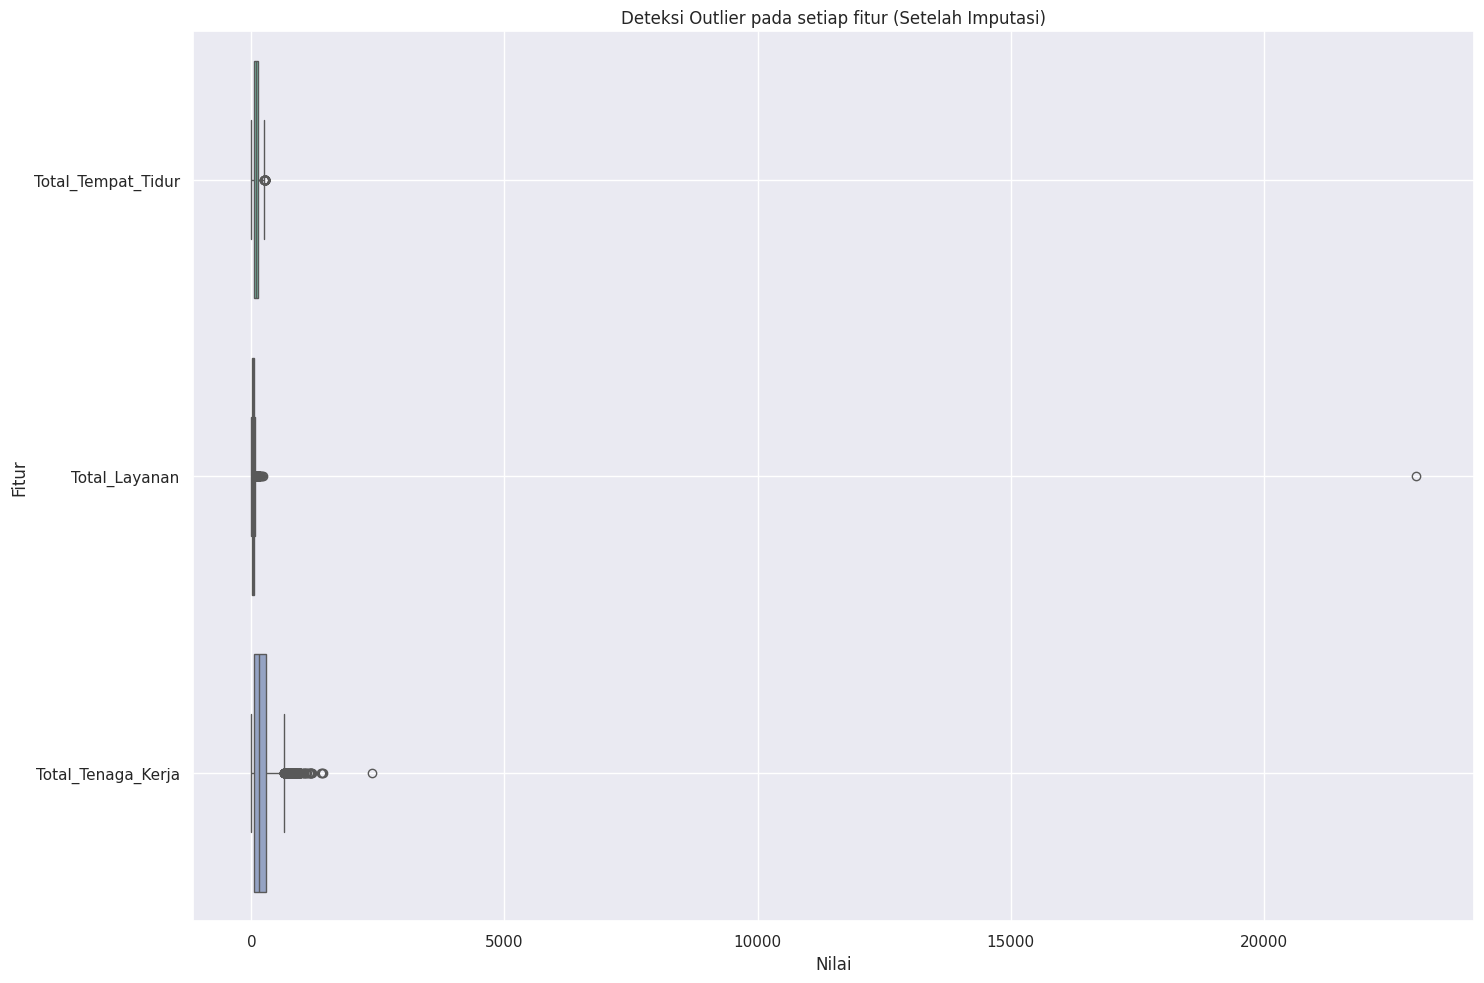

In [ ]:
# ===========================
# VISUALISASI OUTLIER
# ===========================

# Ambil kolom numerik yang diinginkan dari df_clean (kecuali Kode_RS)
numerik_cols_clean = ['Total_Tempat_Tidur', 'Total_Layanan', 'Total_Tenaga_Kerja']

# Buat figure besar agar semua boxplot muat
plt.figure(figsize=(15, 10))

# Plot semua boxplot secara horizontal (orientasi agar lebih mudah dibaca)
sns.boxplot(data=df_outlier_cleaned2[numerik_cols_clean], orient="h", palette="Set2")

plt.title("Deteksi Outlier pada setiap fitur (Setelah Imputasi)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ===========================
# DESKRIPSI DATA SETELAH PENANGANAN OUTLIER
# ===========================
print("\n=== Statistik Deskriptif Setelah Penanganan Outlier ===")
display(df_outlier_cleaned2.describe())


=== Statistik Deskriptif Setelah Penanganan Outlier ===


,Kode_RS,Total_Tempat_Tidur,Total_Layanan,Total_Tenaga_Kerja
count,2.954000e+03,2954.000000,2954.000000,2954.000000
mean,3.807193e+06,103.282329,45.541300,203.184496
std,2.022346e+06,61.340502,423.291894,210.626861
min,0.000000e+00,0.000000,-5.000000,0.000000
25%,3.171784e+06,53.000000,21.000000,52.000000
50%,3.326050e+06,100.000000,30.000000,142.000000
75%,5.104772e+06,135.000000,45.000000,289.000000
max,9.271080e+06,270.000000,23000.000000,2392.000000


In [ ]:
# Simpan hasil outlier removal
df_outlier_cleaned2.to_csv("dataset_after_outlier.csv", index=False)

# **4.VISUALISASI KORELASI**

## Melihat Korelasi Antar Fitur Numerik


=== Matriks Korelasi Fitur Numerik ===


,Kode_RS,Total_Tempat_Tidur,Total_Layanan,Total_Tenaga_Kerja
Kode_RS,1.000000,-0.006436,-0.027868,-0.032683
Total_Tempat_Tidur,-0.006436,1.000000,0.025728,0.714120
Total_Layanan,-0.027868,0.025728,1.000000,0.020474
Total_Tenaga_Kerja,-0.032683,0.714120,0.020474,1.000000


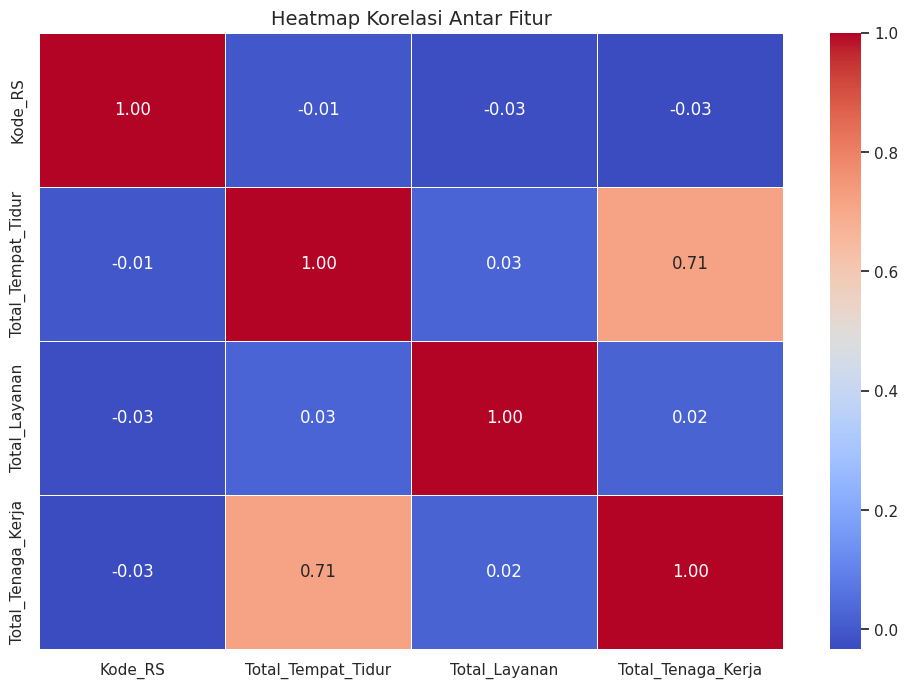

In [ ]:
# Korelasi
correlation_matrix = df_outlier_cleaned[num_cols].corr()
print("\n=== Matriks Korelasi Fitur Numerik ===")
display(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur", fontsize=14)
plt.show()

## Pair Pot

In [ ]:
# Pairplot
print("\n=== Pairplot Antar Fitur Numerik ===")
sns.pairplot(df_outlier_cleaned[num_cols], diag_kind='kde', corner=True)
plt.show()


=== Distribusi Fitur Utama ===


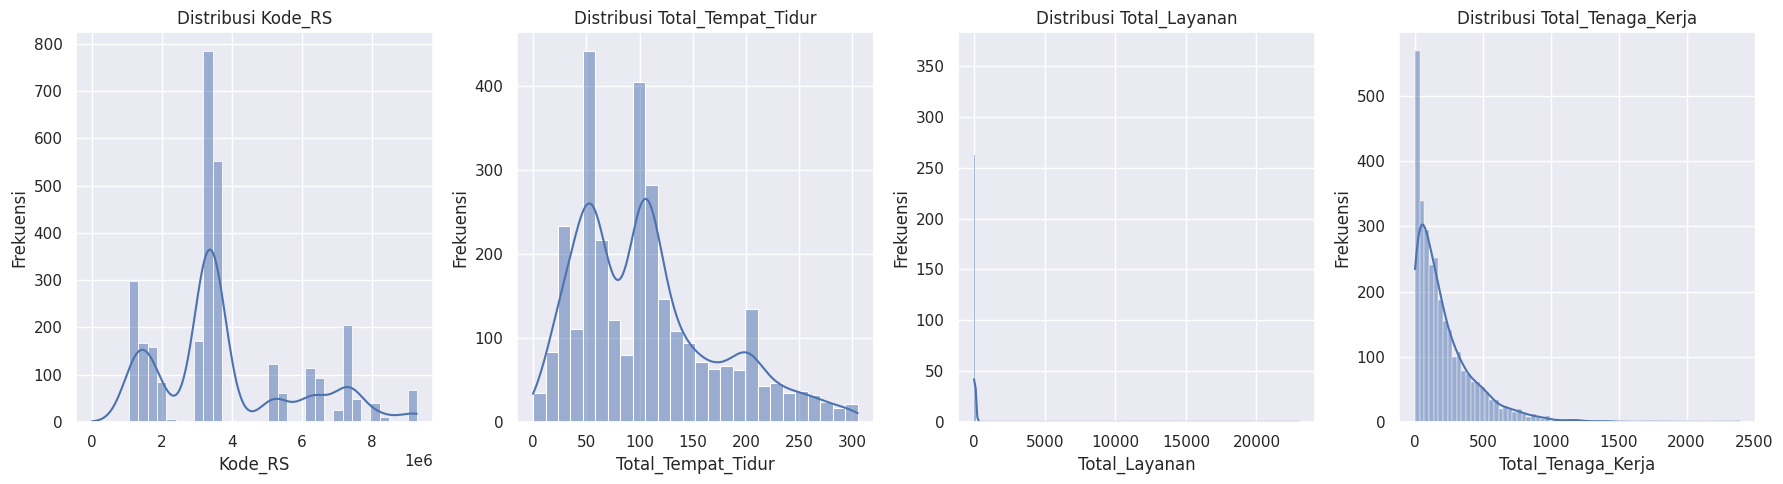


=== Total Tempat Tidur Berdasarkan Jenis RS ===


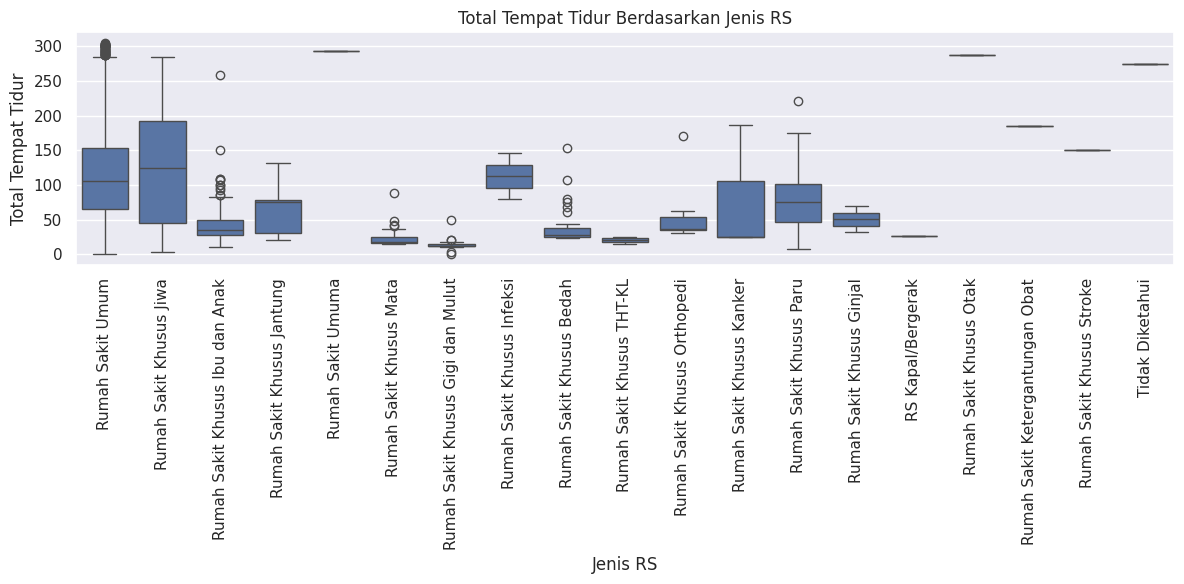

In [ ]:
# ===========================
# EKSPLORASI FITUR UTAMA
# ===========================

# Visualisasi distribusi fitur numerik utama
main_numeric_features = [ 'Kode_RS', 'Total_Tempat_Tidur', 'Total_Layanan', 'Total_Tenaga_Kerja']

print("\n=== Distribusi Fitur Utama ===")

plt.figure(figsize=(18, 5))
for i, col in enumerate(main_numeric_features):
    plt.subplot(1, 4, i + 1)
    sns.histplot(data=df_outlier_cleaned, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Anda juga bisa mengeksplorasi hubungan fitur utama dengan kolom kategorikal,
# contoh: Total_Tempat_Tidur berdasarkan Jenis_RS atau Kelas_RS.
# Berikut contoh untuk Jenis_RS:

print("\n=== Total Tempat Tidur Berdasarkan Jenis RS ===")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_outlier_cleaned, x='Jenis_RS', y='Total_Tempat_Tidur')
plt.xticks(rotation=90)
plt.title('Total Tempat Tidur Berdasarkan Jenis RS')
plt.xlabel('Jenis RS')
plt.ylabel('Total Tempat Tidur')
plt.tight_layout()
plt.show()